##  Analytics Vidhya Practise problem - HR Analytics

#### Step 1: Define your problem
  - The main objective is to predict an employee's promotion. Binary classification problem.

----------

#### Step 2: Hypothesis generation
What can affect an employee promotion?
  - Performance & KPIs
  - How much impact s(he) made on the business
  - How long as s(he) been associated with the company?
  - Have they won any awards?
-------        
#### Step 3: Understanding the dataset 
<b> 3.1 - Import necessary libs and read data </b>

In [17]:
print(train.dtypes)
print(train.shape)
print(test.shape)

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object
(54808, 14)
(23490, 13)


Now we know about our predictors & target features. <br>
We also understand what is the data type of each feature
<br>
Understanding continuous & categorical variables accordingly



In [18]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Here we can see - <br>
{{Some insights in bullets}}

In [19]:
cat_var = train.dtypes.loc[train.dtypes == 'object'].index
print(cat_var)

train['department'].value_counts()/train.shape[0]
train['region'].value_counts()/train.shape[0]
train['education'].value_counts()/train.shape[0]
# train['gender'].value_counts()/train.shape[0]
# train['recruitment_channel'].value_counts()/train.shape[0]

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')


Bachelor's          0.669045
Master's & above    0.272314
Below Secondary     0.014688
Name: education, dtype: float64

-------
#### Step 4: Data Preparation
<b> 4.1 - Missing value treatment <b>

In [20]:
train.isnull().sum()
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

Here we have to deal cat and con vars seperately. <br>
- Either we can drop the NaN observations
- Or we can impute them based on mean (con) or mode (cat)  <br>

<i> Dealing with con vars </i>

In [21]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(train.iloc[:, 8:9])
train.iloc[:, 8:9] = imputer.transform(train.iloc[:, 8:9])

# now for test
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean')
imputer = imputer.fit(test.iloc[:, 8:9])
test.iloc[:, 8:9] = imputer.transform(test.iloc[:, 8:9])

c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<i> Dealing with cat vars </i>

In [22]:
# education is a categorical var so mode imptutaion
Education_Null_Indices = train[train.education.isnull()].index
for el in Education_Null_Indices: train.education[el] = "Bachelor's"

#now for test

Education_Null_Indices = test[test.education.isnull()].index
for el in Education_Null_Indices: test.education[el] = "Bachelor's"

c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


And tada! No missing values! <br> <br>
<b> 4.2 - Outlier treatment </b> <br>

First let us detect outliers using Z-Score 
* Using Scatter plot

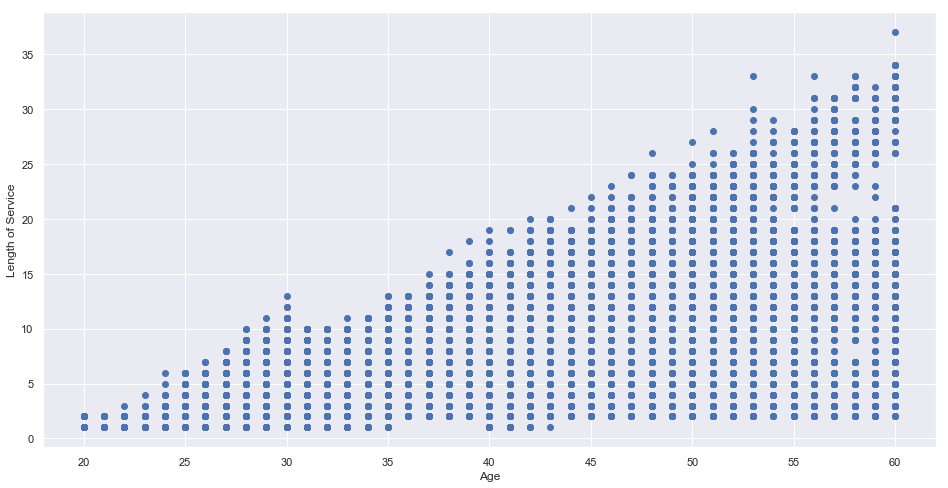

In [35]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['age'], train['length_of_service'])
ax.set_xlabel('Age')
ax.set_ylabel('Length of Service')
plt.show()

* Using Box Plot

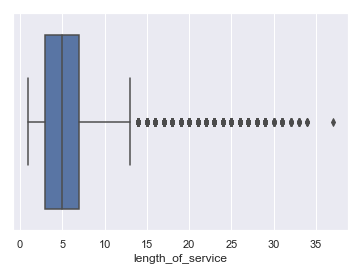

In [24]:
import seaborn as sns
sns.boxplot(x=train['length_of_service'])

* Using Z-Score

In [25]:
from scipy import stats
import numpy as np

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
con_train = train.select_dtypes(include=numerics)
z = np.abs(stats.zscore(con_train))
print(np.where(z > 3))

(array([   11,    39,    42, ..., 54796, 54797, 54799], dtype=int64), array([8, 8, 2, ..., 8, 6, 6], dtype=int64))


* Removing Outliers if Z-Score > 3

In [26]:
print(con_train.shape)
con_train = con_train[(z < 3).all(axis=1)]
print(con_train.shape)

(54808, 9)
(47444, 9)


<b> 4.3 - Redundancy Check <b>

In [27]:
train.duplicated('employee_id').sum()

0

<b>4.4 - Imbalance Check </b>


In [28]:
train['is_promoted'].value_counts()/train.shape[0]

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

This is an heavily imbalanced dataset. Inorder to deal with this, we can do the following -

----

#### 5. Exploratory Data Analysis
<b>5.1 Univariate Analysis </b>

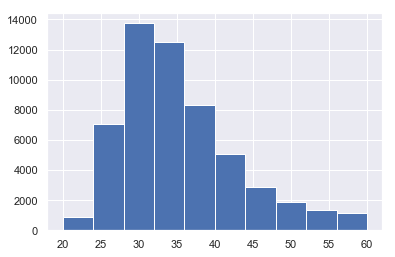

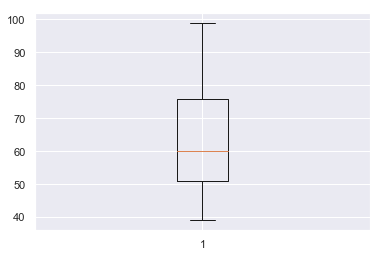

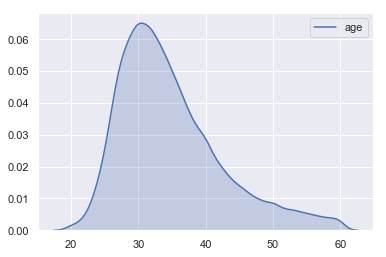

c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


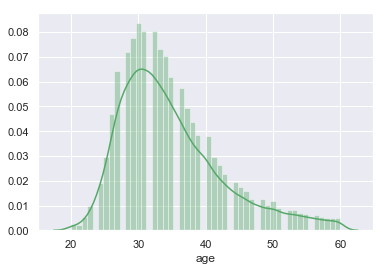

In [41]:
#Histogram
plt.hist(train.age, bins=10)
plt.show()

#Box Plot
plt.boxplot(train.avg_training_score)
plt.show()

#Density Plot
sns.kdeplot(train['age'], shade=True)
plt.show()

#Dist Plot
sns.distplot(train['age'], color="g")
plt.show()

<b> 5.2 Bivariate Analysis </b>
  - Correlation (Con & Con)

In [30]:
train.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004364,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.059804,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.005710,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004364,-0.059804,0.005710,1.000000,0.000239,0.338134,0.026669,0.072065,0.153406
length_of_service,0.001274,-0.057275,0.657111,0.000239,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.338134,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026669,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.072065,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153406,-0.010670,0.221582,0.195871,0.181147,1.000000


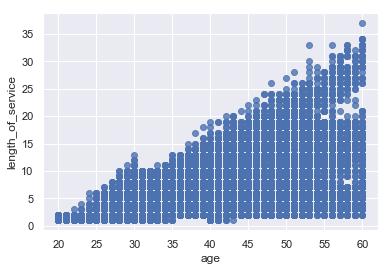

c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


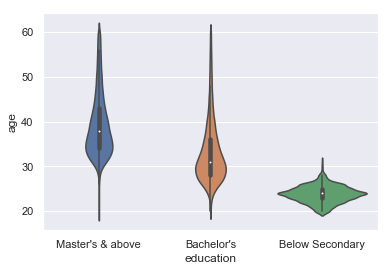

In [31]:
#Scatter Plot
# test.plot('age', 'length_of_service', kind = 'scatter')
sns.regplot(x=train["age"], y=train["length_of_service"], fit_reg=False)
plt.show()

#Violin Plot
sns.violinplot(x = 'education', y = 'age', data = train)

* Cross Tab (Cat & Con)

In [32]:
crosstab = pd.crosstab(train.education, train['is_promoted'], margins = True)
# print(crosstab)
crosstab.iloc[:-1,:-1]

is_promoted,0,1
education,,
Bachelor's,35948,3130
Below Secondary,738,67
Master's & above,13454,1471


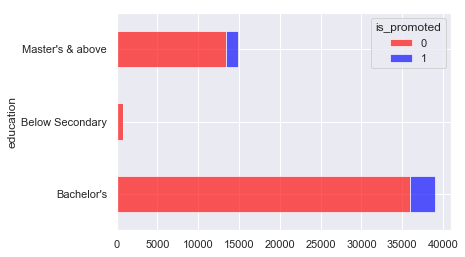

In [33]:
crosstab.iloc[:-1,:-1].plot(kind = 'barh', stacked = True, color = ['red','blue'], alpha = 0.65)

In [34]:
def percentConvert(x):
    return x / float(x[-1])
crosstab.apply(percentConvert, axis = 0)

is_promoted,0,1,All
education,,,
Bachelor's,0.716953,0.670523,0.712998
Below Secondary,0.014719,0.014353,0.014688
Master's & above,0.268329,0.315124,0.272314
All,1.000000,1.000000,1.000000


* Pairplot

c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


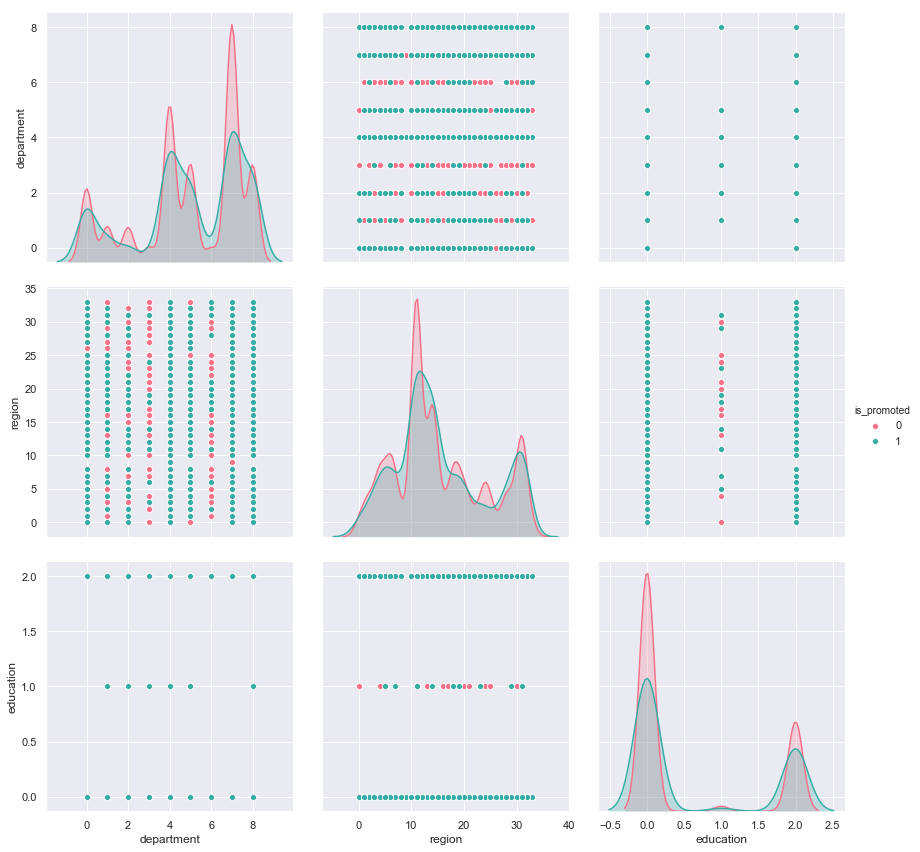

In [45]:
sns.pairplot(train, hue='is_promoted',palette="husl", x_vars=["department","region","education"], y_vars=["department","region","education"], size=4)
plt.show()

----
#### 6. Feature Engineering:
<b> 6.1 Feature Transformation </b>
1. Normalisation

In [36]:
from sklearn import preprocessing

x = train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pandas.DataFrame(x_scaled)

ValueError: could not convert string to float: 'Sales & Marketing'

<b> 6.2 Feature Creation </b>

--------

#### 7. Predictive Modeling:
For modeling we are going to use sklearn, we have to adopt the following steps:
* Preprocessing: sklearn accepts only numeric data so we've to convert text to numbers. Then we'll split our dataset into Train and Test
* Training model: fit the model on training data
* Making predictions: use the model to make predictions on test data
* Analyze results: compare the train and test accuracy and derive insights required to improve the model


<b> 7.1 Encoding categorical variables </b>

In [47]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [37]:
#Step 1 - Data Preprocessing. Conv text to numbers. 
#Label encoder is used to conv categories to num

from sklearn.preprocessing import LabelEncoder
categorical_variables = train.dtypes[train.dtypes == 'object'].index
categorical_variables

from sklearn.preprocessing import LabelEncoder
categorical_variables = test.dtypes[test.dtypes == 'object'].index
categorical_variables

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [38]:
#Conv them using Label Encoder
le = LabelEncoder()
for var in categorical_variables:
    train[var] = le.fit_transform(train[var])

train.head()

le = LabelEncoder()
for var in categorical_variables:
    test[var] = le.fit_transform(test[var])

<b> 7.2 Machine Learning Algorithms <b>
 
* Decision tree Classfier

In [39]:
from sklearn.tree import DecisionTreeClassifier

X = train.iloc[:,-1]
y = train.iloc[:, 0]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision = decision.fit(X_train, y_train)
y_pred = decision.predict(X_test)

# from sklearn.metrics import accuracy_score
# result = accuracy_score(y_test, y_pred) * 100
# result

(43846, 14) (43846,)
(10962, 14) (10962,)


MemoryError: could not allocate 22987931648 bytes

In [ ]:
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, y_pred) * 100
result

* KNN

In [147]:
from sklearn.neighbors import KNeighborsClassifier

X = train.iloc[:,-1]
y = train.iloc[:, 0]

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
knnClassifier = classifier.fit(X_train, y_train.ravel())
y_pred = knnClassifier.predict(X_test)

from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, y_pred)*100
result

0.0

* GNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBClassifier = GaussianNB()
GNBClassifier = GNBClassifier.fit(X_train, y_train.ravel())
y_pred = GNBClassifier.predict(X_test)



from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, y_pred)*100
result

* Logistic Regression

In [49]:
#create prediction model
model = LogisticRegression()

#fit model
model.fit(X_train, Y_train)

#predict!
predictions = model.predict(X_test)

#check accuracy
print("Model --- LogisticRegression")
print("Accuracy: {} ".format(accuracy_score(Y_test,predictions) * 100))
print(classification_report(Y_test, predictions))


* Creating Confusion Matrix

In [ ]:
#plotting confusion matrix on heatmap
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, xticklabels=['reject','admit'], yticklabels=['reject','admit'])
plt.figure(figsize=(3,3))
plt.show()

-----

<b> 7.3 Comparing Different Algos </b>

In [ ]:
num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
scoring = 'accuracy'

#bring out em cross validation
for name, model in models:
	kfold = KFold(n_splits = 10, random_state=7)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
	print(msg)

In [ ]:
#lets box plot model scores

fig = pyplot.figure()
fig.suptitle('ML algo comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

-------
<b> 7.4 Comparing Accuracy, Confusion matrix of XgBoost, RF, SVM and Decision Tree </b>

In [4]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.model_selection import train_test_split

data  =  pd.read_csv("Iris.csv")

#Create Dependent and Independent Datasets based on our Dependent #and Independent features

X  = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm']]
y= data['Species']

#Split the Data into Training and Testing sets with test size as #30%

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True)

In [9]:
classifiers = []
model1 = xgboost.XGBClassifier()
classifiers.append(model1)

model2 = svm.SVC()
classifiers.append(model2)

model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)

model4 = RandomForestClassifier()
classifiers.append(model4)

In [15]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix is %s"%(cm))

Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1) is 0.9555555555555556
Confusion Matrix is [[12  0  0]
 [ 0 16  2]
 [ 0  0 15]]
Accuracy of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is 0.9333333333333333
Confusion Matrix is [[12  0  0]
 [ 0 15  3]
 [ 0  0 15]]
Accuracy of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_spl

c:\users\hewlett packard\anaconda3\envs\py36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


---

<b> 7.5 Linear Regression </b>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

## Checking Accuracy

from sklearn.metrics import r2_score
print round(r2_score(y_test, y_pred)*100, 2) , '%'

-----------

<b> 7.6 K-Means Clustering </b> <br>

The objective of any clustering algorithm is to ensure that the distance between datapoints in a cluster is very low compared to the distance between 2 clusters. In other words, members of a group are very similar, and members of different groups are extremely dissimilar

The mathematics behind clustering, in very simple terms involves minimizing the sum of square of distances between the cluster centroid and its associated data points:

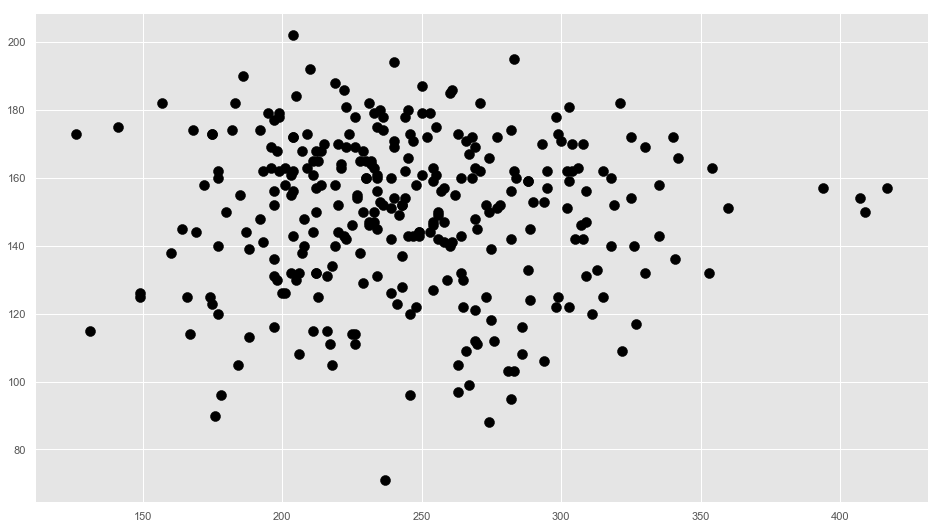

In [54]:
dataset=pd.read_csv('kmeans.csv')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Plotting the values to understand the spread
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='black', s=100)

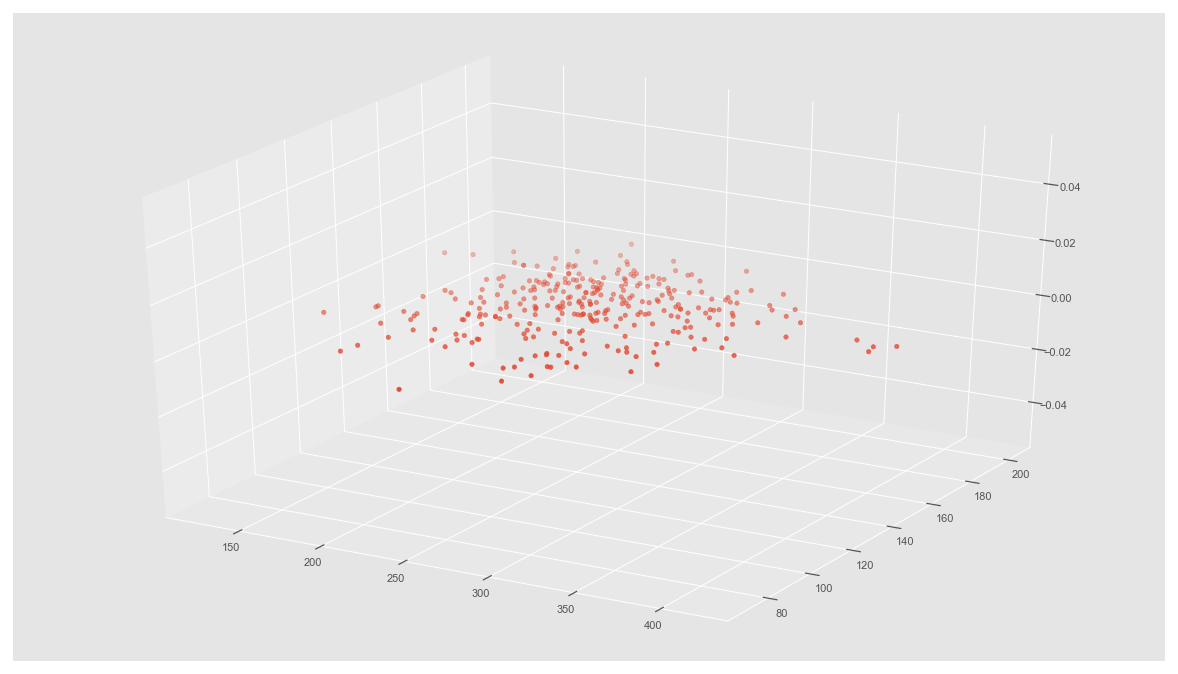

In [55]:
##plot in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])

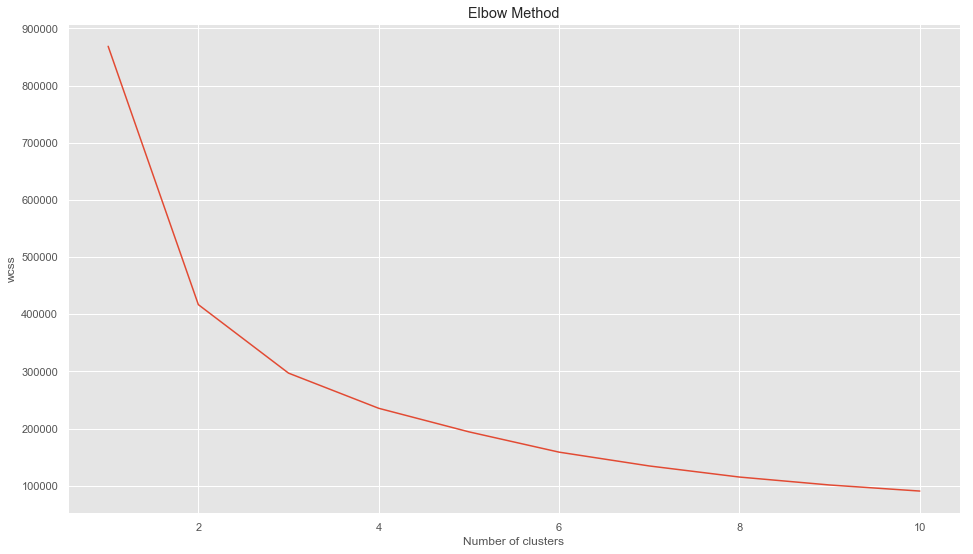

In [56]:
#Clustering fundamentals

X=dataset.iloc[:,[0,1]].values
#Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()


In [57]:
#Calculating the silhoutte coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.44006694211403197
For n_clusters=3, The Silhouette Coefficient is 0.35962629048722355
For n_clusters=4, The Silhouette Coefficient is 0.35271446789203426
For n_clusters=5, The Silhouette Coefficient is 0.34234642174166596
For n_clusters=6, The Silhouette Coefficient is 0.3590814313888438
For n_clusters=7, The Silhouette Coefficient is 0.3585010284851828
For n_clusters=8, The Silhouette Coefficient is 0.3652732948963327
For n_clusters=9, The Silhouette Coefficient is 0.34845055219315657
For n_clusters=10, The Silhouette Coefficient is 0.35084966600519873


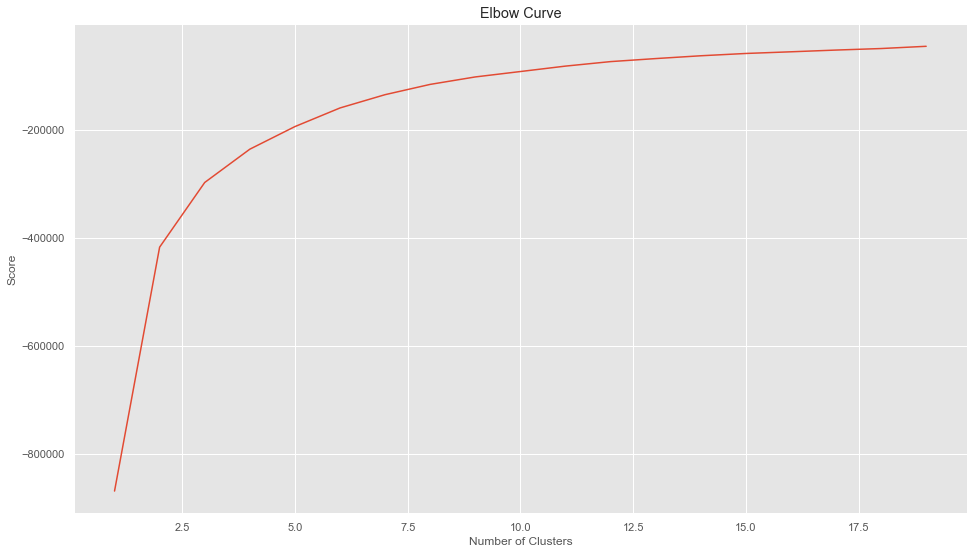

[-868805.478547855, -416914.6776446215, -297101.37642019376, -235435.61549707668, -193575.39319653236, -159049.2243098167, -134416.17992468236, -115377.71549205667, -101573.26402451155, -91568.50731943203, -81509.12771764603, -73168.65178632093, -67562.16797156601, -62359.58367840638, -58089.38846802418, -54988.97439531565, -51780.53158002312, -48951.57159130008, -44804.31007302807]


In [58]:
import pylab as pl
from sklearn.decomposition import PCA

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

print(score)

In [59]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 868805.4785478548
k: 2  cost: 416914.67764462065
k: 3  cost: 297101.3764201943
k: 4  cost: 235568.75630353513
k: 5  cost: 193333.51167275637
k: 6  cost: 158999.20745160058
k: 7  cost: 135314.10167803388
k: 8  cost: 115686.57935998778
k: 9  cost: 102546.93727877043
k: 10  cost: 91556.28599714936



In [60]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

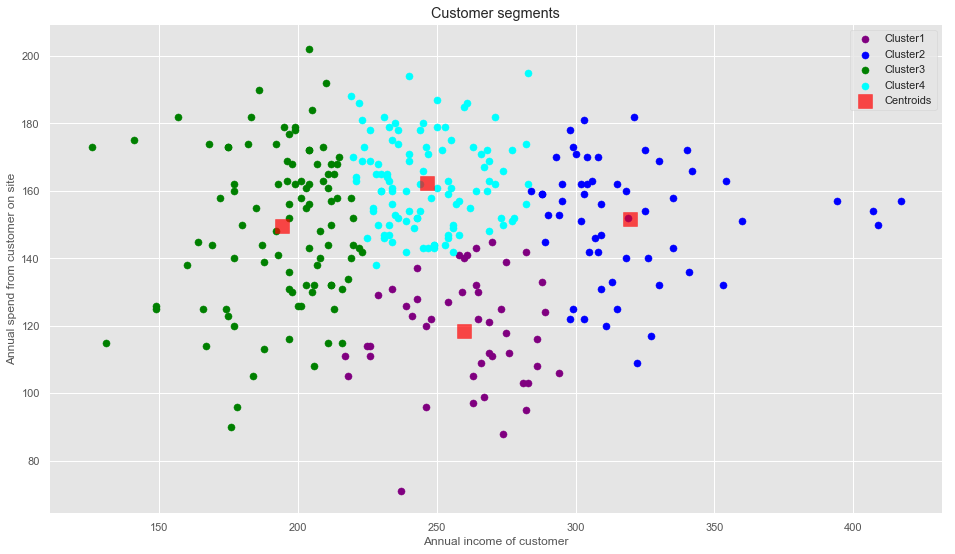

In [61]:
#Visualising the clusters for k=4
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()


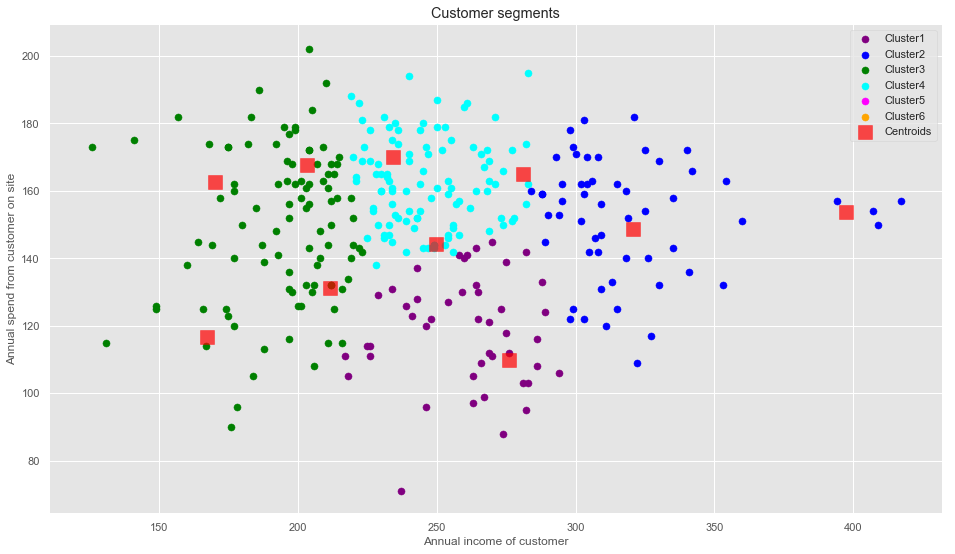

In [64]:
#Visualising the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()



-------